# CRD : Cycloidal Reducer Designer

## Ref.

* DETERMINATION OF REAL CLEARANCES BETWEEN CYCLOIDAL SPEED REDUCER ELEMENTS BY THE APPLICATION OF HEURISTIC OPTIMIZATION
  - https://doi.org/10.21278/TOF.42102


## Notation

_Where :_

$R_a$ : the radius of the rolling circle

$R_b$ : the radius of the base circle

$\alpha$ : the angular position of the starting contact point and the current contact point of the base and the rolling circle in relation to the centre of the base circle

$\beta$ : the swivel angle of the rolling circle

$e$ : eccentricity

$q$ : the radius of the ring gear roller – equidistant distance

$\phi$ : the auxiliary angle


$ \beta = \frac{R_b}{R_a} \alpha $

$ \phi = atan \left( \frac{sin(\beta)}{\frac{R_a}{e} cos(\beta)} \right) $


$ x_c = (R_b + R_a) \cdot cos(\alpha) + e \cdot cos(\alpha + \beta) - q \cdot cos ( \alpha + \phi ) $

$ y_c = (R_b + R_a) \cdot sin(\alpha) + e \cdot sin(\alpha + \beta) - q \cdot sin ( \alpha + \phi ) $

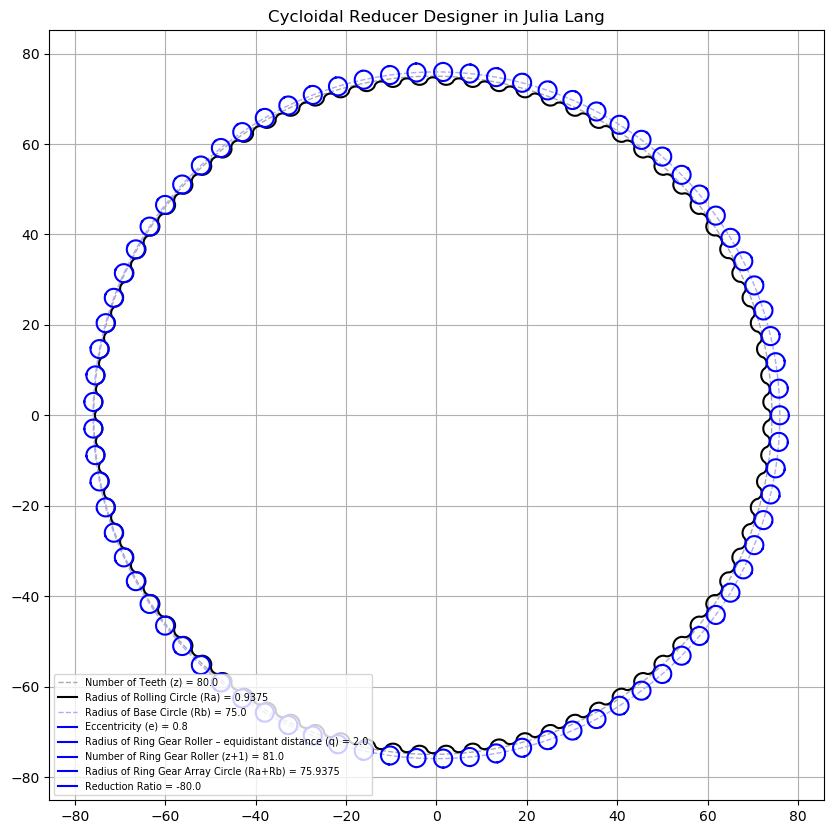

In [9]:
## DETERMINATION OF REAL CLEARANCES BETWEEN CYCLOIDAL SPEED REDUCER ELEMENTS BY THE APPLICATION OF HEURISTIC OPTIMIZATION
# https://doi.org/10.21278/TOF.42102

using PyPlot
PyPlot.svg(true)

## Parameters
z = 80.0;     # Number of Teeth
#Ra = 0.54;    # Radius of Rolling Circle
Rb = 75.0;    # Radius of Base Circle
e = 0.8;      # Eccentricity
q = 2.0;      # Radius of Ring Gear Roller – equidistant distance

theta = deg2rad(360.0/(z+1));    # Array Angle of Ring Gear Roller
Ra = Rb/z;    # Radius of Rolling Circle
#Rb = Ra*z;    # Radius of Base Circle

# The angular position of the starting contact point and the current contact point of the base and the rolling circle in relation to the centre of the base circle
point = 0.01;
alpha = [0.0:deg2rad(point):deg2rad(360.0);];

## Calculate for Disc
beta = (Rb/Ra).*alpha;
phi = atan.( sin.(beta) ./ ((Ra/e).+cos.(beta)) );
Xc = (Rb+Ra).*cos.(alpha) .+ e.*cos.(alpha.+beta) .- q.*cos.(alpha.+atan.(phi));
Yc = (Rb+Ra).*sin.(alpha) .+ e.*sin.(alpha.+beta) .- q.*sin.(alpha.+atan.(phi));

## Calculate for Ring Gear Roller
Q = hcat( q.*cos.(alpha).+(Rb+Ra), q.*sin.(alpha) );
i=1;
for i=1:floor(Int64,z)+1
    Q = hcat(Q, Q[:,2*i-1].*cos(theta).-Q[:,2*i].*sin(theta) );
    Q = hcat(Q, Q[:,2*i-1].*sin(theta).+Q[:,2*i].*cos(theta) );
end

## Plot
f=figure(figsize=(10,10))
grid("on")
axis("equal")
title("Cycloidal Reducer Designer in Julia Lang")

plot( Rb.*cos.(alpha).-e, Rb.*sin.(alpha), color="#aaaaaa", linewidth="1", linestyle="--" ) 
plot(Xc.-e, Yc, color="#000000", linewidth="1.5")

plot( (Rb+Ra).*cos.(alpha), (Rb+Ra).*sin.(alpha), color="#aaaaff", linewidth="1", linestyle="--" )
for i=1:floor(Int64,z)+1
    plot(Q[:,2*i-1],Q[:,2*i],color="#0000ff",linewidth="1.5")
end

legend(["Number of Teeth (z) = $z",
        "Radius of Rolling Circle (Ra) = $Ra",
        "Radius of Base Circle (Rb) = $Rb",
        "Eccentricity (e) = $e",
        "Radius of Ring Gear Roller – equidistant distance (q) = $q",
        "Number of Ring Gear Roller (z+1) = $(z+1)",
        "Radius of Ring Gear Array Circle (Ra+Rb) = $(Ra+Rb)",
        "Reduction Ratio = $(z/(-1))"], loc="lower left", fontsize="x-small")

savefig("case.svg")

## Save case.scr
fileout = open("case.scr", "w")
println(fileout, "spline")
for i=1:floor(Int64,length(alpha)/z+1)
    println(fileout, Xc[i].-e,",",Yc[i])
end
println(fileout, "")
println(fileout, "")
println(fileout, "")

println(fileout, "array")
println(fileout, "L")
println(fileout, "")
println(fileout, "P")
println(fileout, "-",e,",0")
println(fileout, Int(z))
println(fileout, "360")
println(fileout, "Y")

println(fileout, "circle")
println(fileout, "-",e,",0")
println(fileout, Rb)

println(fileout, "circle")
println(fileout, (Rb+Ra),",0")
println(fileout, q)

println(fileout, "array")
println(fileout, "L")
println(fileout, "")
println(fileout, "P")
println(fileout, "0,0")
println(fileout, Int(z)+1)
println(fileout, "360")
println(fileout, "Y")

println(fileout, "circle")
println(fileout, "0,0")
println(fileout, (Rb+Ra))

close(fileout)

## Save case.csv
fileout = open("case.csv", "w")
println(fileout, "Number of Teeth (z),",z)
println(fileout, "Radius of Rolling Circle (Ra),",Ra)
println(fileout, "Radius of Base Circle (Rb),",Rb)
println(fileout, "Eccentricity (e),",e)
println(fileout, "Radius of Ring Gear Roller (equidistant distance) (q),",q)
println(fileout, "Number of Ring Gear Roller (z+1),",z+1)
println(fileout, "Radius of Ring Gear Array Circle (Ra+Rb),",(Ra+Rb))
println(fileout, "Reduction Ratio,",(z/(-1)))
close(fileout)


In [4]:
Ra

0.9375

In [110]:
360/81

4.444444444444445